Accuracy (KNN): 0.7964601769911505
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.79      0.90      0.84        29
           2       0.74      0.59      0.65        29
           3       0.71      0.80      0.75        25

    accuracy                           0.80       113
   macro avg       0.79      0.80      0.79       113
weighted avg       0.80      0.80      0.79       113



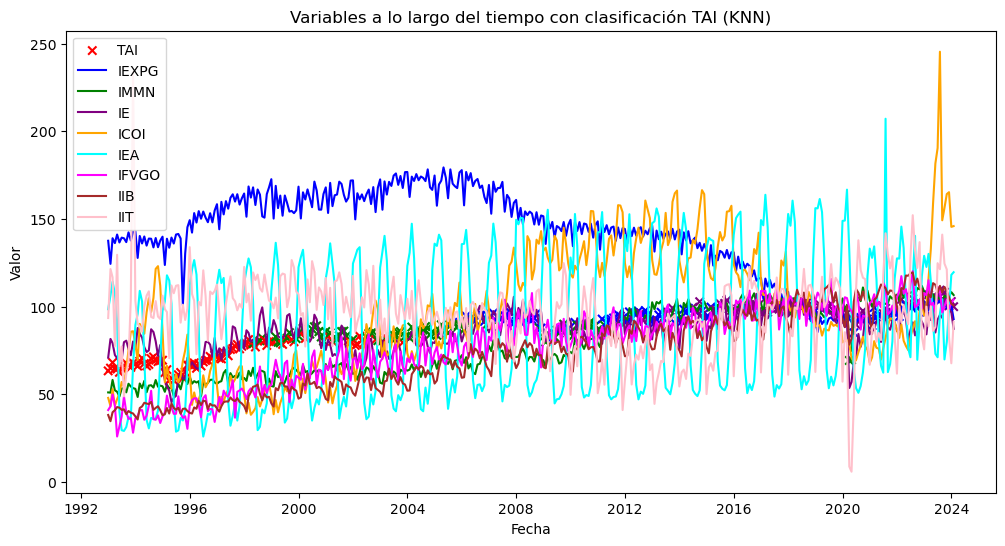

Accuracy (DTR): 0.7610619469026548
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.66      0.79      0.72        29
           2       0.75      0.52      0.61        29
           3       0.77      0.92      0.84        25

    accuracy                           0.76       113
   macro avg       0.77      0.77      0.76       113
weighted avg       0.77      0.76      0.76       113



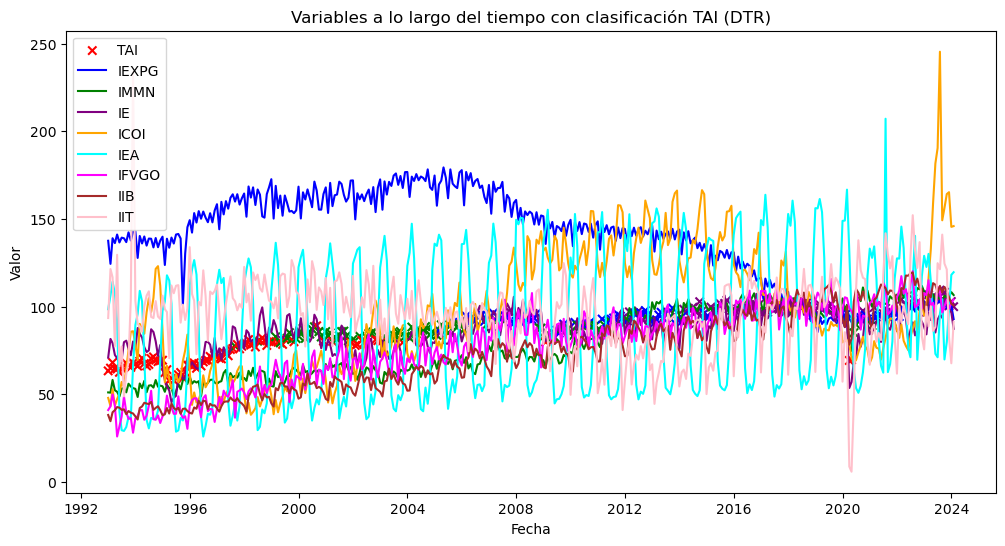

Accuracy (SVM): 0.7787610619469026
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.79      0.79      0.79        29
           2       0.65      0.59      0.62        29
           3       0.71      0.80      0.75        25

    accuracy                           0.78       113
   macro avg       0.77      0.78      0.77       113
weighted avg       0.78      0.78      0.78       113



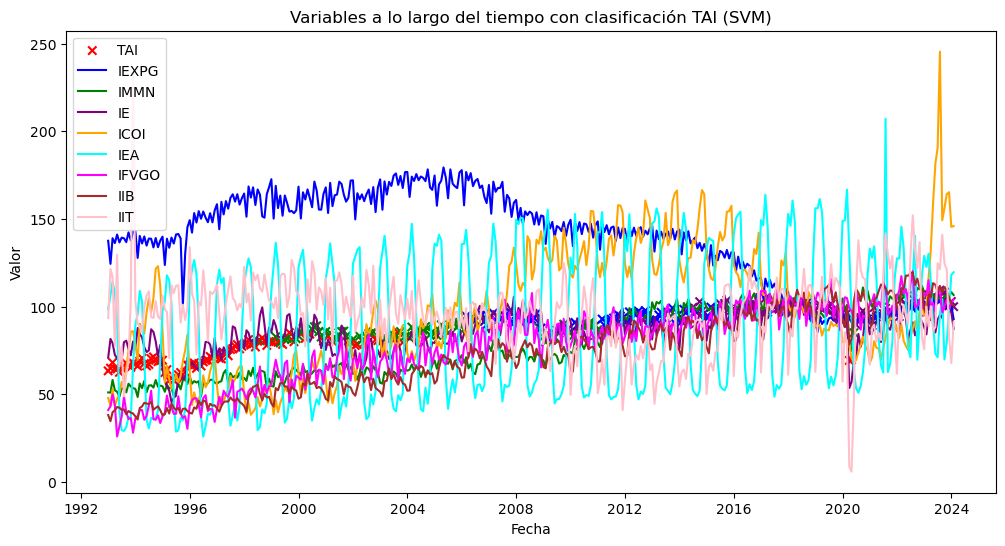

Accuracy (Logistic Regression): 0.7433628318584071
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.71      0.69      0.70        29
           2       0.62      0.55      0.58        29
           3       0.71      0.88      0.79        25

    accuracy                           0.74       113
   macro avg       0.74      0.75      0.74       113
weighted avg       0.74      0.74      0.74       113



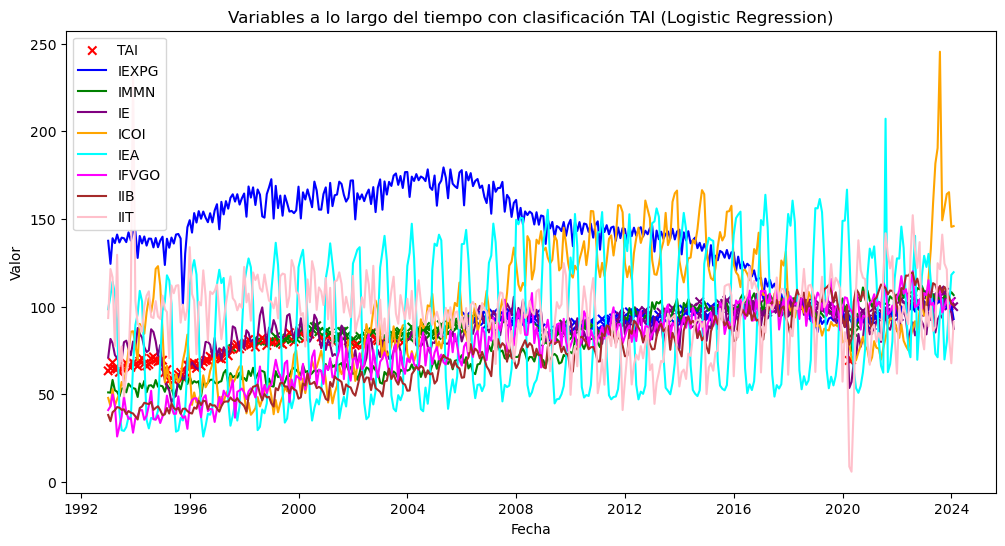

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from typing import Tuple, Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns

def create_plot(subplots: int = 111) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 1)
    return fig, ax

def plot_points(ax: plt.Axes, x, y, scatter_params: Dict[str, Any]):
    ax.scatter(x, y, **scatter_params)

def plot_line(ax: plt.Axes, x, y, color, label = "line"):
    ax.plot(x, y, color = color, label = label)

def evaluate_and_plot(model, model_name: str, file_path: str):
    df = pd.read_csv(file_path)
    df['TAI_category'] = pd.qcut(df['TAI'], q = 4, labels = False)

    X = df.drop(['Fecha', 'TAI', 'TAI_category'], axis = 1)
    y = df['TAI_category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy ({model_name}): {accuracy}")
    print(class_report)

    df["Fecha"] = pd.to_datetime(df["Fecha"], format = "%d/%m/%y")

    category_colors = {0: "red", 1: "green", 2: "blue", 3: "purple"}
    df["Predicted_Category"] = model.predict(scaler.transform(df.drop(["Fecha", "TAI", "TAI_category"], axis = 1)))
    df["Color"] = df["Predicted_Category"].map(category_colors)

    fig, ax = create_plot()

    scatter_params = {
        "color": df["Color"],
        "label": "TAI",
        "marker": "x"
    }

    plot_points(ax, df["Fecha"], df["TAI"], scatter_params)

    colors = ["blue", "green", "purple", "orange", "cyan", "magenta", "brown", "pink"]

    variables = ["IEXPG", "IMMN", "IE", "ICOI", "IEA", "IFVGO", "IIB", "IIT"]

    for var, color in zip(variables, colors):
        plot_line(ax, df["Fecha"], df[var], color = color, label = var)

    ax.legend()
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.title(f"Variables a lo largo del tiempo con clasificación TAI ({model_name})")
    plt.savefig(f"img2/bplt{model_name}_classification_plot.png")
    plt.show()

evaluate_and_plot(KNeighborsClassifier(n_neighbors = 5), "KNN", "csv/Proyecto.csv")
evaluate_and_plot(DecisionTreeClassifier(random_state = 42), "DTR", "csv/Proyecto.csv")
evaluate_and_plot(SVC(random_state = 42), "SVM", "csv/Proyecto.csv")
evaluate_and_plot(LogisticRegression(random_state = 42, max_iter = 10000), "Logistic Regression", "csv/Proyecto.csv")

In [6]:
def evaluate_and_plot(model, model_name: str, file_path: str):
    # Cargar el archivo CSV desde la ruta correcta
    df = pd.read_csv(file_path)

    # Convertir TAI en una variable categórica
    df['TAI_category'] = pd.qcut(df['TAI'], q=4, labels=False)

    # Dividir los datos en características (X) y la variable objetivo (y)
    X = df.drop(['Fecha', 'TAI', 'TAI_category'], axis=1)
    y = df["TAI_category"]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    cv_scores = cross_val_score(model, X, y, cv = 5, scoring = "accuracy")

    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    print(f"{model_name} [Media: {mean_cv_score: .3f}, Desv: {std_cv_score: .3f}]")

evaluate_and_plot(KNeighborsClassifier(n_neighbors = 5), "KNN", "csv/Proyecto.csv")
evaluate_and_plot(DecisionTreeClassifier(random_state = 42), "DTR", "csv/Proyecto.csv")
evaluate_and_plot(SVC(random_state = 42), "SVM", "csv/Proyecto.csv")
evaluate_and_plot(LogisticRegression(random_state = 42, max_iter = 10000), "Logistic Regression", "csv/Proyecto.csv")

KNN [Media:  0.537, Desv:  0.187]
DTR [Media:  0.513, Desv:  0.151]
SVM [Media:  0.569, Desv:  0.187]
Logistic Regression [Media:  0.577, Desv:  0.217]
